In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1020)>


False

In [3]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [4]:
df = pd.read_csv('fake.csv')

In [5]:
df.shape

(72134, 4)

In [6]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [7]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [8]:
# Replacing the null values with an empty string
df = df.fillna('')

<Axes: xlabel='label', ylabel='count'>

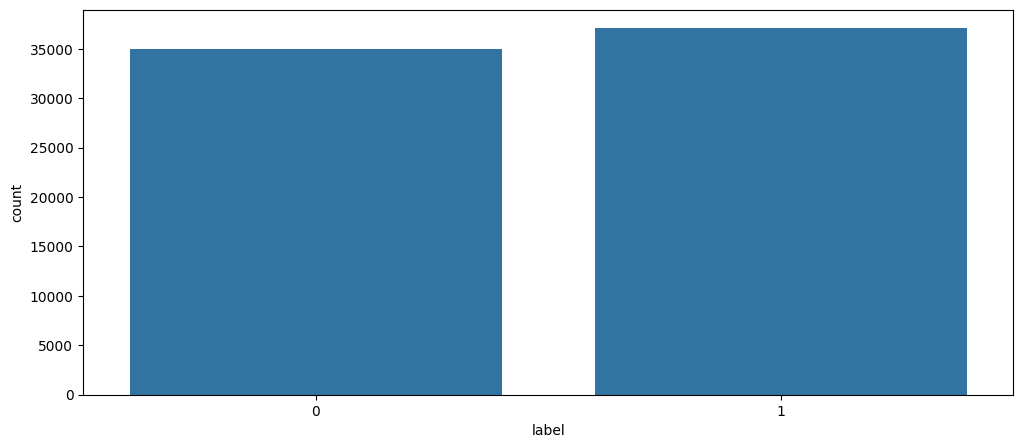

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(x='label',data=df)

Stemming:

Stemming is the process of reducing a word to its Root word

example:
actor, actress, acting --> act

In [10]:
port_stem = PorterStemmer()

In [11]:
def stemming(text):
    stemmed_text = re.sub('[^a-zA-Z]', ' ', text)
    stemmed_text = stemmed_text.lower()
    stemmed_text = stemmed_text.split()
    stemmed_text = [port_stem.stem(word) for word in stemmed_text if not word in stopwords.words('english')]
    stemmed_text = ' '.join(stemmed_text)
    return stemmed_text

In [12]:
df['title'] = df['title'].apply(stemming)

In [13]:
print(df['title'])

0        law enforc high alert follow threat cop white ...
1                                                         
2        unbeliev obama attorney gener say charlott rio...
3        bobbi jindal rais hindu use stori christian co...
4        satan russia unv imag terrifi new supernuk wes...
                               ...                        
72129    russian steal research trump hack u democrat p...
72130    watch giuliani demand democrat apolog trump ra...
72131         migrant refus leav train refuge camp hungari
72132    trump tussl give unpopular mexican leader much...
72133           goldman sach endors hillari clinton presid
Name: title, Length: 72134, dtype: object


In [14]:
# Separating dataset
X = df['title'].values
Y = df['label'].values

In [15]:
print(X)

['law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video'
 ''
 'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina video'
 ... 'migrant refus leav train refuge camp hungari'
 'trump tussl give unpopular mexican leader much need shot arm'
 'goldman sach endors hillari clinton presid']


In [16]:
print(Y)

[1 1 1 ... 0 0 1]


In [17]:
Y.shape

(72134,)

In [18]:
# Converting text data into numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X )

In [19]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 629110 stored elements and shape (72134, 19639)>
  Coords	Values
  (0, 407)	0.3190180925014663
  (0, 1802)	0.33473541566384035
  (0, 3679)	0.24871262252022117
  (0, 5509)	0.31820565801047196
  (0, 6425)	0.28932771754845743
  (0, 6730)	0.48553136502134386
  (0, 7887)	0.26746434949988324
  (0, 9699)	0.22829788917209384
  (0, 17260)	0.24871262252022117
  (0, 17363)	0.2542650376115143
  (0, 18648)	0.1297506867782943
  (0, 19106)	0.19134939529376566
  (2, 1049)	0.28404017886581956
  (2, 2673)	0.30809679188606154
  (2, 2919)	0.3639616996972358
  (2, 6880)	0.2652283770602196
  (2, 8020)	0.2692285294185893
  (2, 11864)	0.2231406266784195
  (2, 12011)	0.16878852994653004
  (2, 12744)	0.27904818164471595
  (2, 13591)	0.22687620695463123
  (2, 14591)	0.3580030298678158
  (2, 15094)	0.1609967301122813
  (2, 16446)	0.1999703023632961
  (2, 18034)	0.35962437110547785
  :	:
  (72130, 17778)	0.13227219506940732
  (72130, 18936)	0.2530249939

Splitting the dataset to training & test data

In [20]:
# stratify=Y : ensures equal proportions of 0/1 to be segregated
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

Training the Model: Logistic Regression

In [36]:
log_classifier = LogisticRegression()
log_classifier.fit(X_train, Y_train)

LogisticRegression()

In [41]:
# Random Forest
Y_pred_test_logreg = log_classifier.predict(X_test)
acc_logreg = round(accuracy_score(Y_pred_test_logreg, Y_test) * 100, 2)
print(f"Accuracy score of the test data (Logistic Regression): {acc_logreg}%")

Accuracy score of the test data (Logistic Regression): 90.06%


Using Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
# Initialize the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on training data
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [59]:
# Random Forest
Y_pred_test_rf = rf_classifier.predict(X_test)
acc_rf = round(accuracy_score(Y_pred_test_rf, Y_test) * 100, 2)
print(f"Accuracy score of the test data (Random Forest): {acc_rf}%")

Accuracy score of the test data (Random Forest): 90.75%


Using Naive Bayes Tree

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
# Convert sparse matrix to dense array
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the model on training
nb_classifier.fit(X_train_dense, Y_train)

GaussianNB()

In [28]:
# Naive Bayes
Y_pred_test_nb = nb_classifier.predict(X_test_dense)
acc_nb = round(accuracy_score(Y_pred_test_nb, Y_test) * 100, 2)
print(f"Accuracy score of the test data (Naive Bayes): {acc_nb}%")

Accuracy score of the test data (Naive Bayes): 65.05%


Using Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
# Initialize the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on training data
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
# Decision Tree
Y_pred_test_dt = dt_classifier.predict(X_test)
acc_dtree = round(accuracy_score(Y_pred_test_dt, Y_test) * 100, 2)
print(f"Accuracy score of the test data (Decision Tree): {acc_dtree}%")

Accuracy score of the test data (Decision Tree): 86.88%


Using K-Nearest Neighbors(KNN)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
# Initialize the KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model on training data
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [34]:
# K-Nearest Neighbors
Y_pred_test_knn = knn_classifier.predict(X_test)
acc_knn = round(accuracy_score(Y_pred_test_knn, Y_test) * 100, 2)
print(f"Accuracy score of the test data (KNN): {acc_knn}%")

Accuracy score of the test data (KNN): 54.99%


In [43]:
# Create a DataFrame for comparison
models = pd.DataFrame({
    'Model': ["Logistic Regression", 'KNN', 'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_logreg, acc_knn, acc_rf, acc_nb, acc_dtree]
})

# Sort and display the DataFrame
models.sort_values(by='Score', ascending=False, inplace=True)
models.reset_index(drop=True, inplace=True)

In [44]:
print(models)

                 Model  Score
0        Random Forest  90.75
1  Logistic Regression  90.06
2        Decision Tree  86.88
3          Naive Bayes  65.05
4                  KNN  54.99


Evaluation

Displaying predictions

In [64]:
# X_new = X_test[1]

# pred = rf_classifier.predict(X_new)
# print(pred)

# if pred == 1:
#     print("The News is Fake!")
# else:
#     print("The News is Real!")

# Function to predict the news
def predict_news(headline):
    processed_input = stemming(headline)  # Preprocess the input
    vectorized_input = vectorizer.transform([processed_input])  # Vectorize the input
    prediction = rf_classifier.predict(vectorized_input)  # Make prediction
    
    if prediction[0] == 1:
        return "The News is Fake!"
    else:
        return "The News is Real!"

Check on various inputs like:
- Scientists Confirm Chocolate is a Superfood for Weight Loss
- Senate Passes Bill to Increase Funding for Education
- Apple Unveils Latest iPhone with Enhanced Features
- Government to Provide Free Pizza to Every Citizen
- NASA Successfully Launches Mars Rover Mission

In [72]:
new_headline = input("Enter a News Headline/Content: ")
result = predict_news(new_headline)
print(result)

The News is Real!
